# Часть I: 


In [5]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from src.data_generation import generate_sample
from src.graph_utils import build_distance_graph, max_independent_set_size, build_knn_graph, max_degree

# Исследование зависимости числовой характеристики T от параметров распределений θ и υ


In [17]:
t3_alphas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5] 
normal_alphas = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20]

n_samples = 50
n_iter = 1000
k = 5

# Результаты
t3_deg_means = []
normal_deg_means = []

# --- t3 ---
for alpha in t3_alphas:
    degs = []
    for _ in range(n_iter):
        data = generate_sample("t3", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, k=k)
        deg = max_degree(G)
        degs.append(deg)
    t3_deg_means.append(np.mean(degs))

# --- normal ---
for alpha in normal_alphas:
    degs = []
    for _ in range(n_iter):
        data = generate_sample("normal", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, k=k)
        deg = max_degree(G)
        degs.append(deg)
    normal_deg_means.append(np.mean(degs))

In [11]:
# После вычислений t3_deg_means и normal_deg_means

print("t3_alphas:", t3_alphas)
print("Средние max_degree для t3:", t3_deg_means)

print("\nnormal_alphas:", normal_alphas)
print("Средние max_degree для normal:", normal_deg_means)


t3_alphas: [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5]
Средние max_degree для t3: [np.float64(39.9), np.float64(21.943), np.float64(10.127), np.float64(9.819), np.float64(9.655), np.float64(9.518), np.float64(9.282), np.float64(9.214), np.float64(9.12)]

normal_alphas: [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20]
Средние max_degree для normal: [np.float64(8.974), np.float64(9.018), np.float64(9.024), np.float64(8.993), np.float64(9.02), np.float64(8.995), np.float64(9.012), np.float64(9.032), np.float64(9.019), np.float64(8.985)]


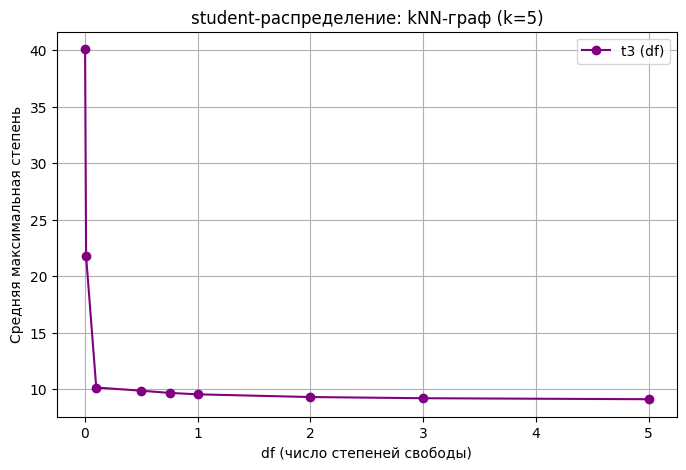

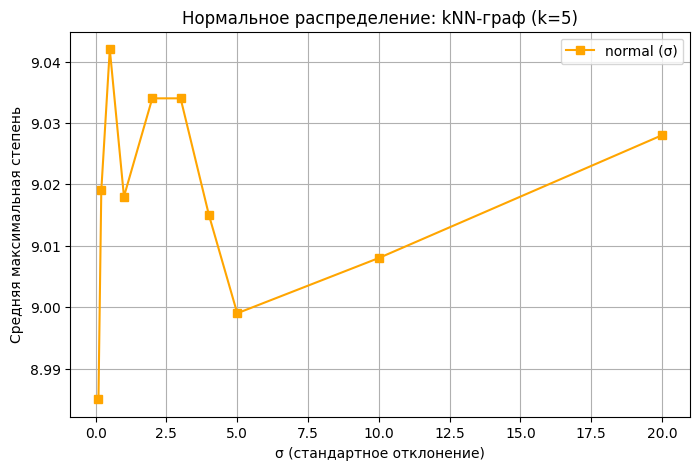

In [20]:
# --- График 1: t3 ---
plt.figure(figsize=(8, 5))
plt.plot(t3_alphas, t3_deg_means, marker='o', color='purple', label='t3 (df)')
plt.xlabel("df (число степеней свободы)")
plt.ylabel("Средняя максимальная степень")
plt.title("student-распределение: kNN-граф (k=5)")
plt.grid(True)
plt.legend()
plt.show()

# --- График 2: normal ---
plt.figure(figsize=(8, 5))
plt.plot(normal_alphas, normal_deg_means, marker='s', color='orange', label='normal (σ)')
plt.xlabel("σ (стандартное отклонение)")
plt.ylabel("Средняя максимальная степень")
plt.title("Нормальное распределение: kNN-граф (k=5)")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
t3_alphas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5, 10 , 30]   
normal_alphas = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 1000]  

n_samples = 50
n_iter = 1000
distance_threshold = 1  

# Результаты
t3_mis_means = []
normal_mis_means = []

# --- t3 ---
for alpha in tqdm(t3_alphas, desc="t3 alphas"):
    mis_list = []
    for _ in range(n_iter):
        data = generate_sample("t3", alpha=alpha, size=n_samples)
        G = build_distance_graph(data, d=distance_threshold)
        mis_size = max_independent_set_size(G)
        mis_list.append(mis_size)
    t3_mis_means.append(np.mean(mis_list))

# --- normal ---
for alpha in tqdm(normal_alphas, desc="normal alphas"):
    mis_list = []
    for _ in range(n_iter):
        data = generate_sample("normal", alpha=alpha, size=n_samples)
        G = build_distance_graph(data, d=distance_threshold)
        mis_size = max_independent_set_size(G)
        mis_list.append(mis_size)
    normal_mis_means.append(np.mean(mis_list))

normal alphas: 100%|████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.19it/s]


In [14]:
print("t3_alphas:", t3_alphas)
print("Средние размеры макс. независимого множества (t3):", [round(val, 3) for val in t3_mis_means])

print("\nnormal_alphas:", normal_alphas)
print("Средние размеры макс. независимого множества (normal):", [round(val, 3) for val in normal_mis_means])


t3_alphas: [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5, 10, 30]
Средние размеры макс. независимого множества (t3): [np.float64(49.986), np.float64(49.2), np.float64(39.468), np.float64(19.375), np.float64(14.741), np.float64(12.217), np.float64(8.214), np.float64(6.953), np.float64(5.966), np.float64(5.321), np.float64(4.896)]

normal_alphas: [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 1000]
Средние размеры макс. независимого множества (normal): [np.float64(1.0), np.float64(1.207), np.float64(2.751), np.float64(4.689), np.float64(7.995), np.float64(10.706), np.float64(12.98), np.float64(14.946), np.float64(22.411), np.float64(30.256), np.float64(44.001), np.float64(49.319)]


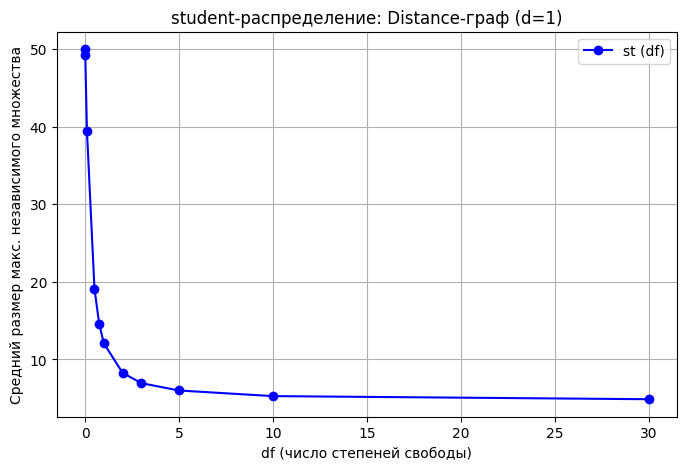

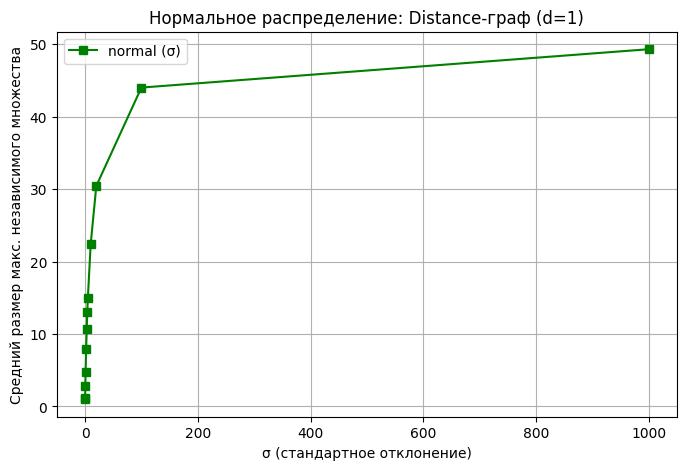

In [24]:
# --- График 1: t3 ---
plt.figure(figsize=(8, 5))
plt.plot(t3_alphas, t3_mis_means, marker='o', color='blue', label='st (df)')
plt.xlabel("df (число степеней свободы)")
plt.ylabel("Средний размер макс. независимого множества")
plt.title(f"student-распределение: Distance-граф (d={distance_threshold})")
plt.grid(True)
plt.legend()
plt.show()

# --- График 2: normal ---
plt.figure(figsize=(8, 5))
plt.plot(normal_alphas, normal_mis_means, marker='s', color='green', label='normal (σ)')
plt.xlabel("σ (стандартное отклонение)")
plt.ylabel("Средний размер макс. независимого множества")
plt.title(f"Нормальное распределение: Distance-граф (d={distance_threshold})")
plt.grid(True)
plt.legend()
plt.show()

# Исследование зависимости числовой характеристики T от параметров процедуры построения графа и размера выборки



In [39]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 150, 250, 500]
k_neighbours = [1, 2, 3, 5, 10, 15, 20, 25, 50]
n_iter = 1000

def plot_grid_max_degree(dist_name, alpha):
    fig, axes = plt.subplots(
        nrows=len(n_samples),
        ncols=len(k_neighbours),
        figsize=(4 * len(k_neighbours), 3 * len(n_samples)),
        sharex=True, sharey=True
    )
    fig.suptitle(f"Max Degree in kNN Graphs — Distribution: {dist_name}, alpha={alpha}", fontsize=16)

    for i, n in enumerate(tqdm(n_samples, desc=f"{dist_name} sample sizes")):
        for j, k in enumerate(k_neighbours):
            degs = []
            for _ in range(n_iter):
                data = generate_sample(dist_name, alpha=alpha, size=n)
                G = build_knn_graph(data, k=k)
                degs.append(max_degree(G))
            
            ax = axes[i, j]
            # Покажем распределение значений max_degree как точечный график
            ax.plot(degs, color="green", alpha=0.3, marker='.', linestyle='None', markersize=1)
            avg_deg = np.mean(degs)
            ax.set_title(f"n={n}, k={k}\navg={avg_deg:.2f}")
            ax.set_xlim(0, n_iter)
            ax.set_ylim(0, max(k_neighbours)+5)

            if j == 0:
                ax.set_ylabel(f"n={n}")
            if i == len(n_samples) - 1:
                ax.set_xlabel(f"k={k}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



t3 sample sizes: 100%|██████████████████████████████████████████████████████| 13/13 [03:59<00:00, 18.40s/it]


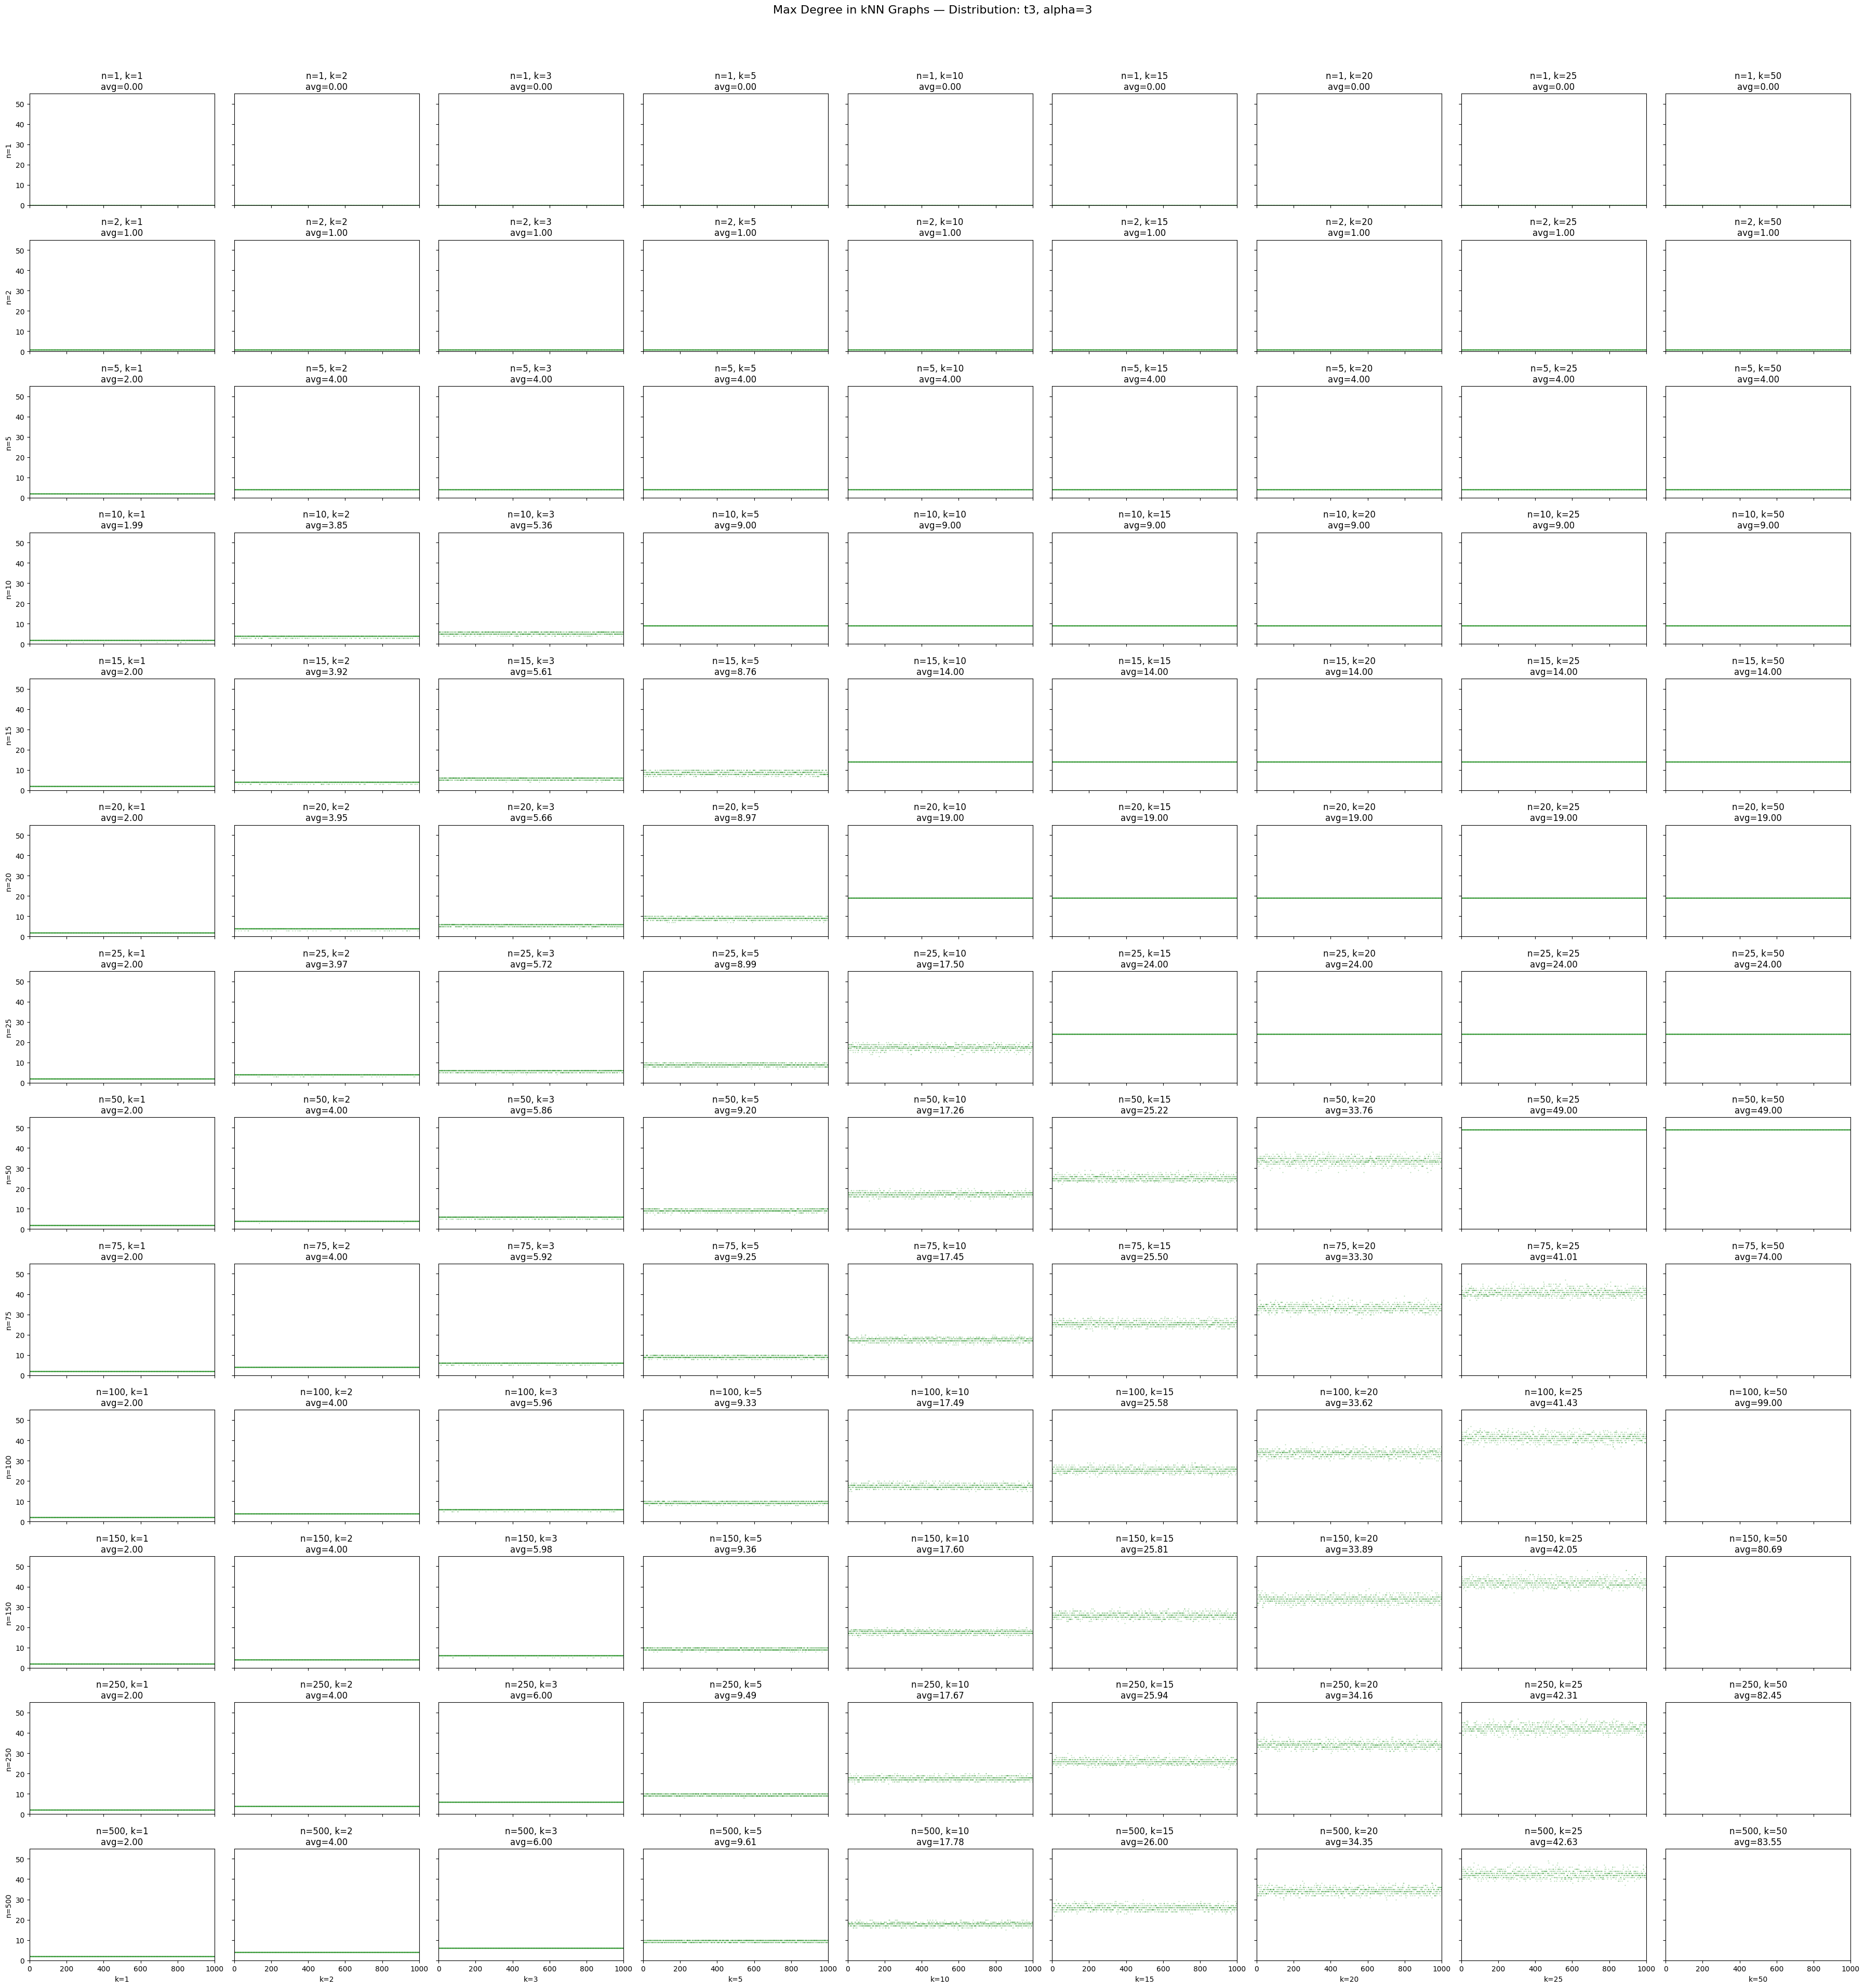

normal sample sizes: 100%|██████████████████████████████████████████████████| 13/13 [03:57<00:00, 18.26s/it]


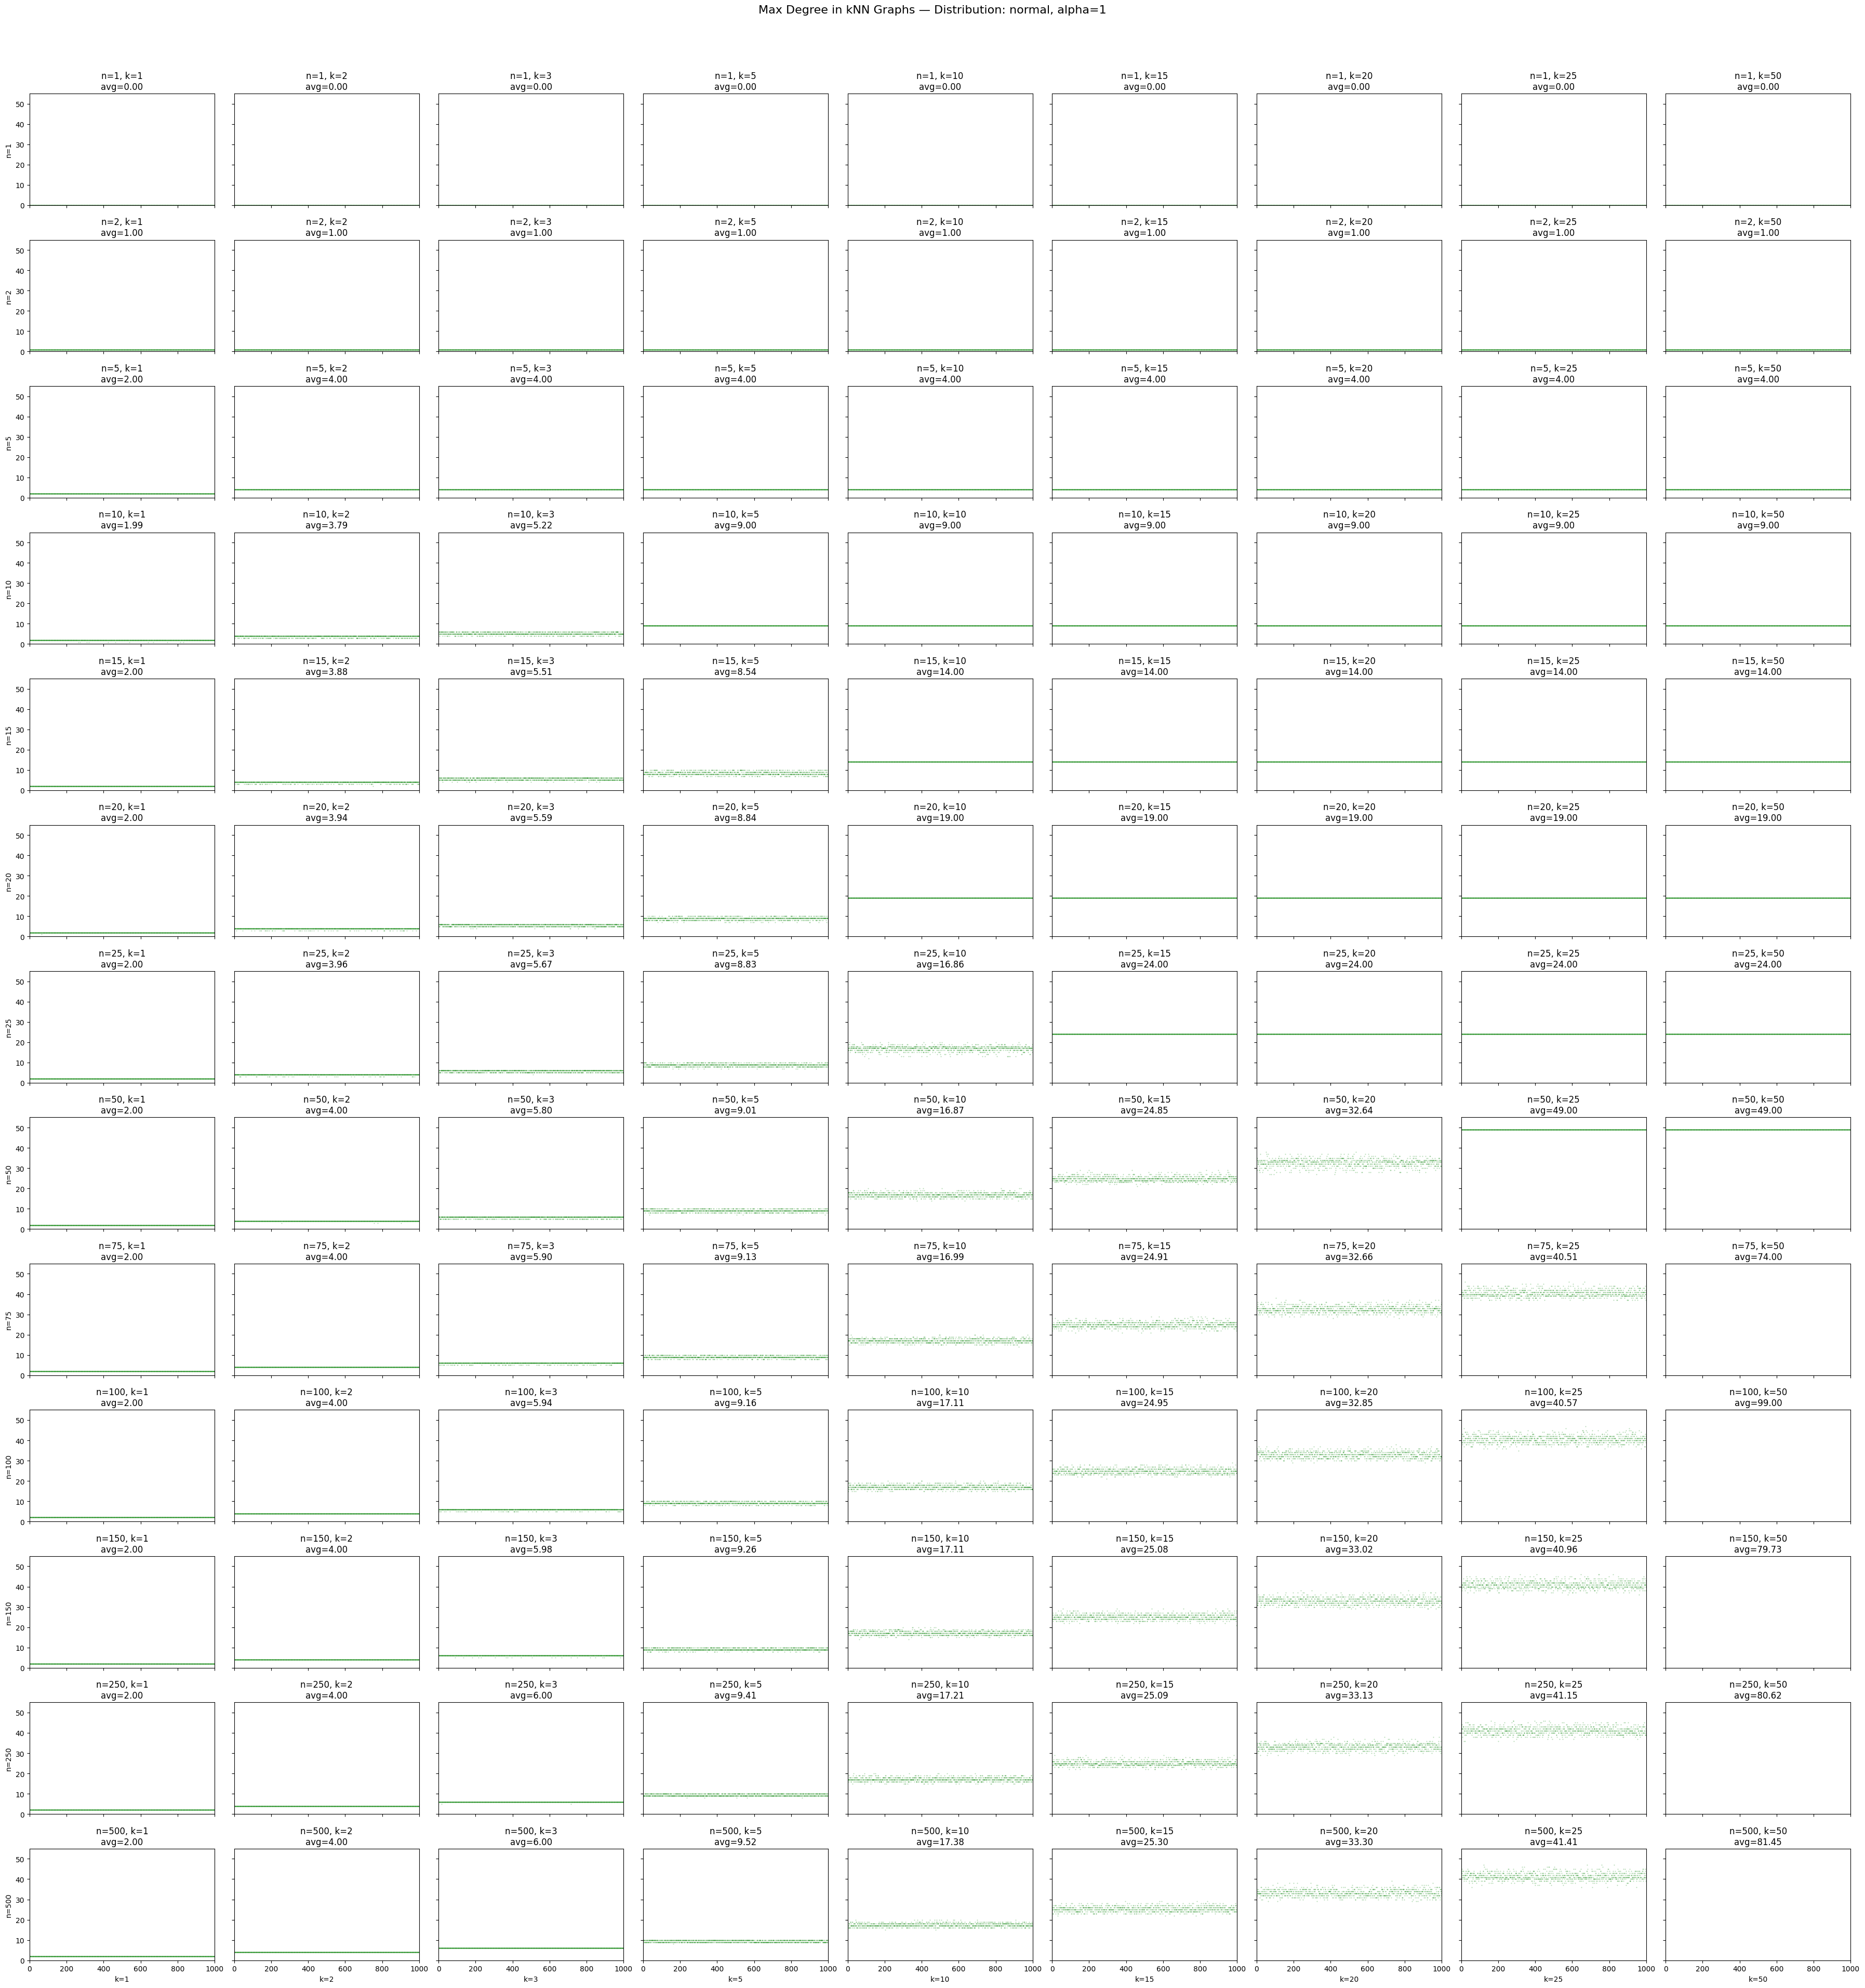

In [40]:
# Фиксированные параметры alpha
t3_alpha = 3
normal_alpha = 1

plot_grid_max_degree("t3", t3_alpha)
plot_grid_max_degree("normal", normal_alpha)

K neighbours: 100%|█████████████████████████████████████████████████████████| 11/11 [02:40<00:00, 14.59s/it]


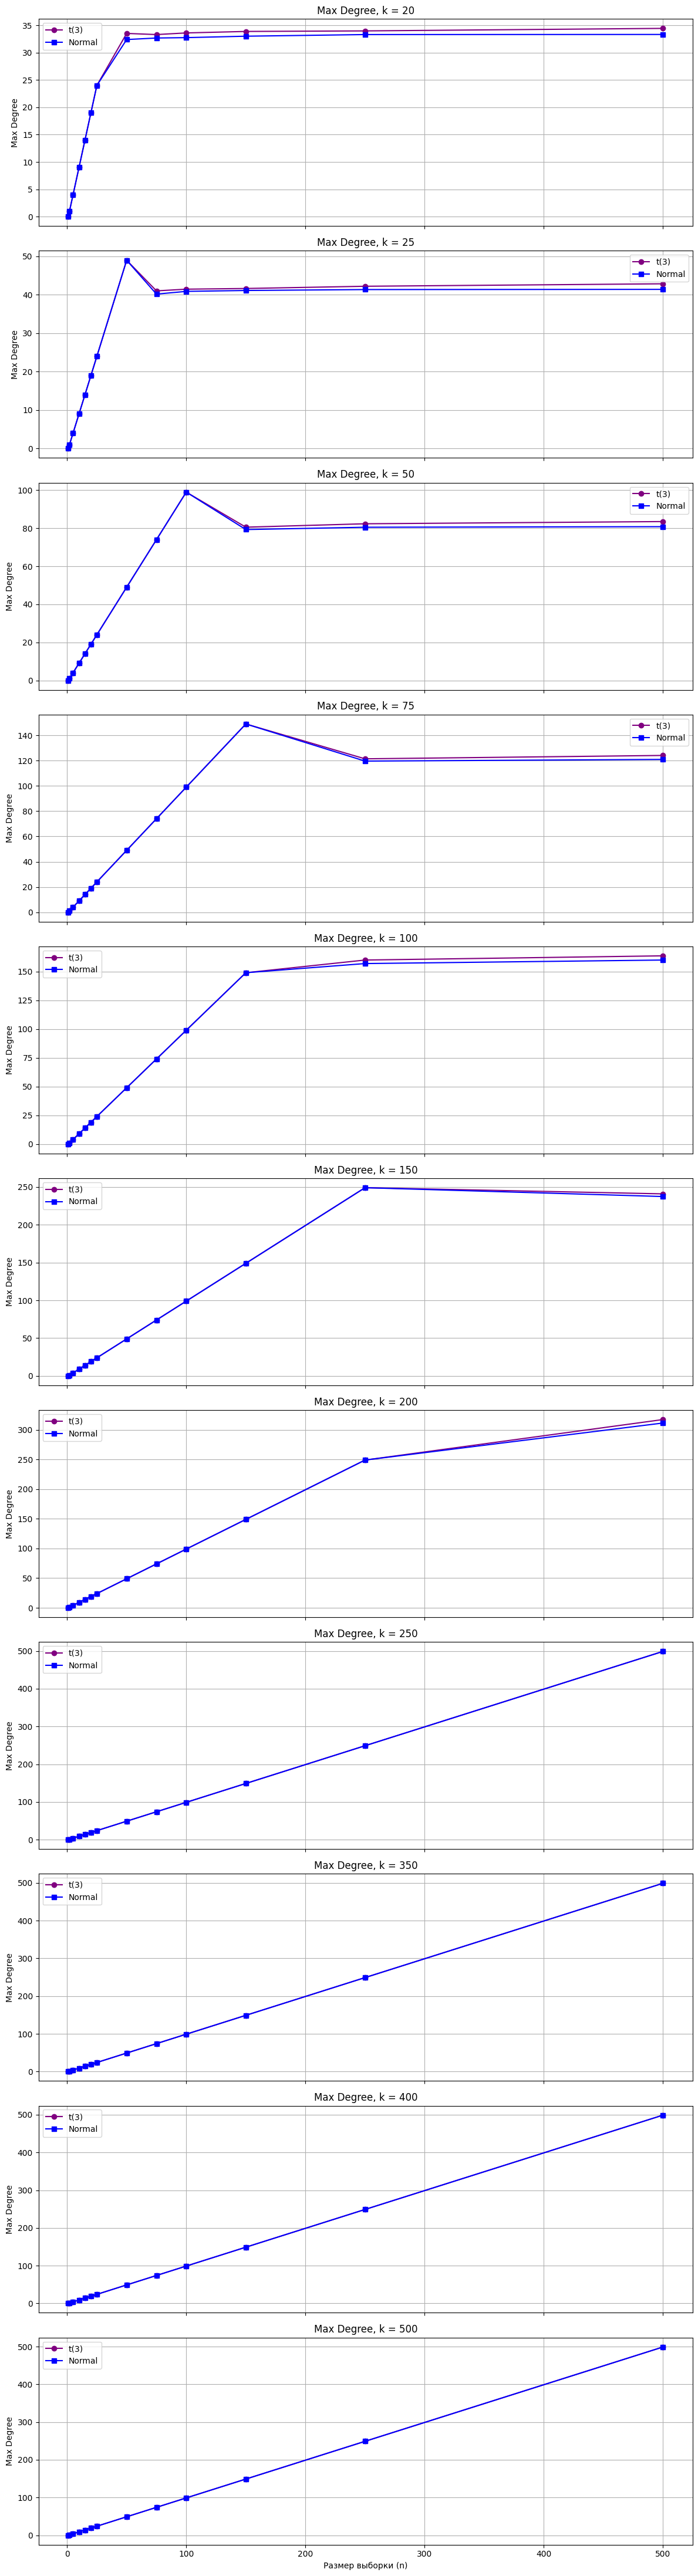

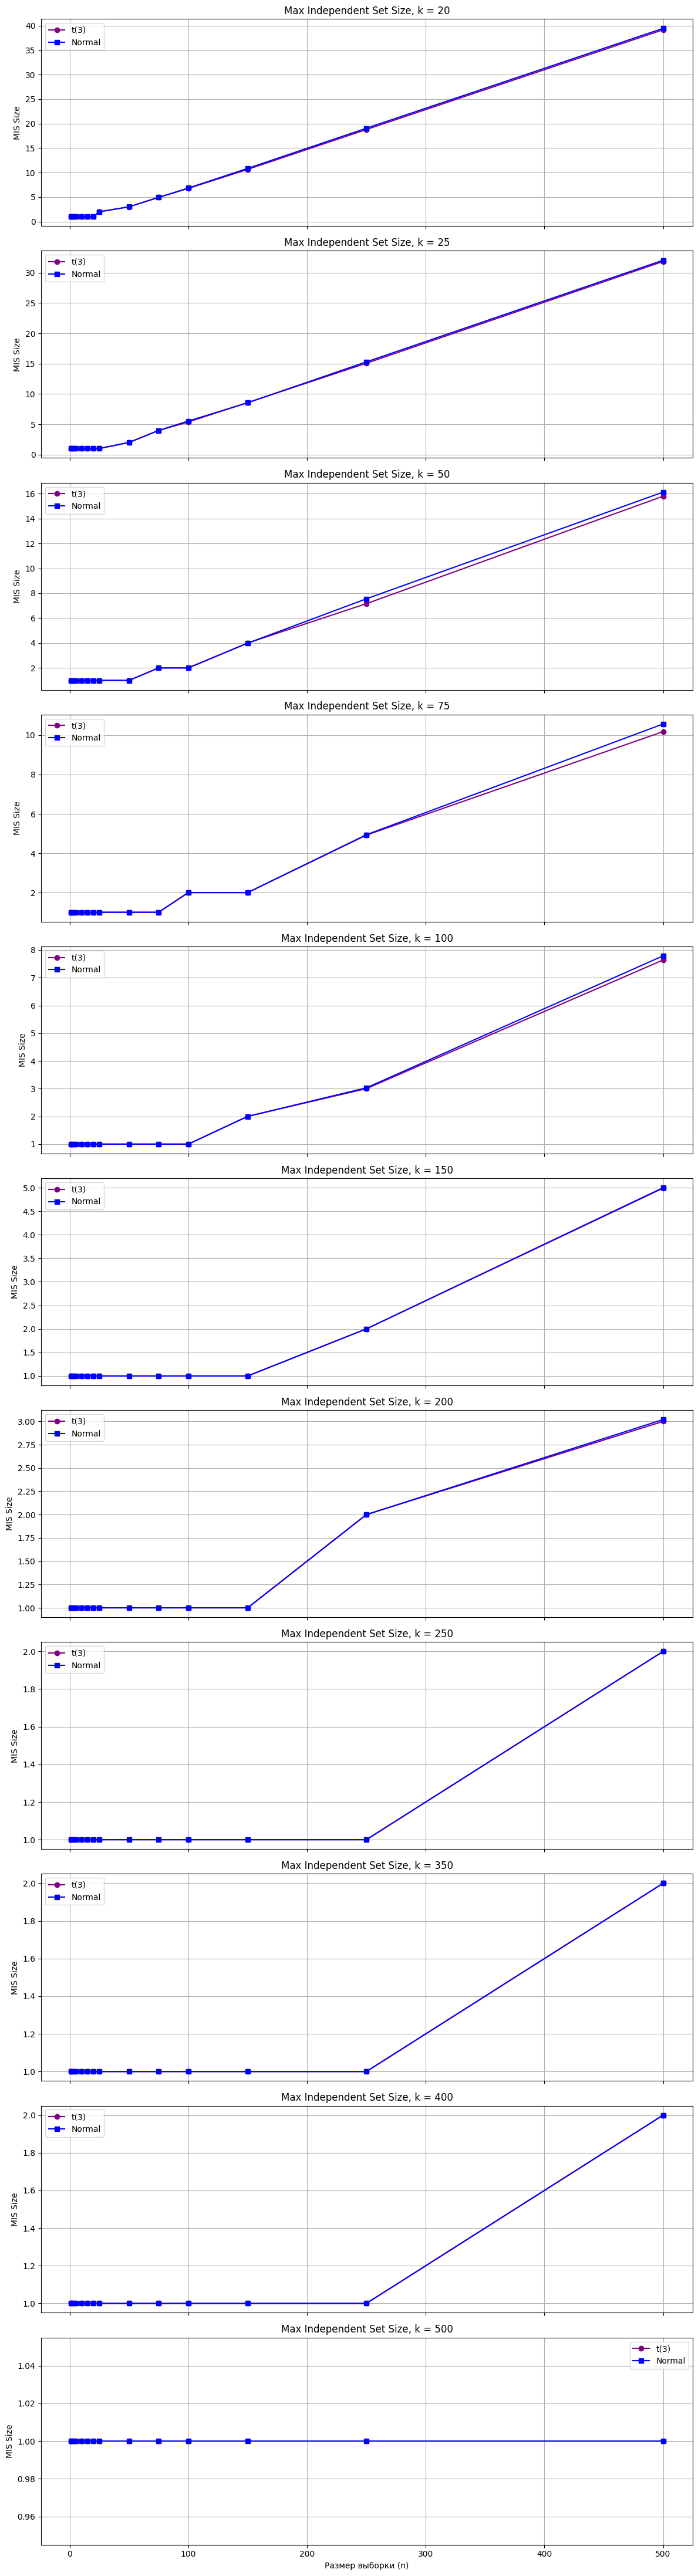

In [ ]:
from scipy.stats import t, norm

n_samples_list = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 150, 250, 500]
k_neighbours_list = [20, 25, 50, 75, 100, 150, 200, 250, 350, 400, 500]
n_iter = 100  


fig_deg, axs_deg = plt.subplots(len(k_neighbours_list), 1, figsize=(12, 4 * len(k_neighbours_list)), sharex=True)
fig_mis, axs_mis = plt.subplots(len(k_neighbours_list), 1, figsize=(12, 4 * len(k_neighbours_list)), sharex=True)

for i, k in enumerate(tqdm(k_neighbours_list, desc="K neighbours")):
    t3_deg = []
    normal_deg = []
    t3_mis = []
    normal_mis = []

    for n in tqdm(n_samples_list, leave=False):
        degs_t3 = []
        degs_norm = []
        mis_t3 = []
        mis_norm = []

        for _ in range(n_iter):
            data_t3 = t.rvs(df=3, size=n)
            G_t3 = build_knn_graph(data_t3, k)
            degs_t3.append(max_degree(G_t3))
            mis_t3.append(max_independent_set_size(G_t3))
            data_norm = norm.rvs(loc=0, scale=1, size=n)
            G_norm = build_knn_graph(data_norm, k)
            degs_norm.append(max_degree(G_norm))
            mis_norm.append(max_independent_set_size(G_norm))

        t3_deg.append(np.mean(degs_t3))
        normal_deg.append(np.mean(degs_norm))
        t3_mis.append(np.mean(mis_t3))
        normal_mis.append(np.mean(mis_norm))

    
    axs_deg[i].plot(n_samples_list, t3_deg, label="t(3)", color="purple", marker="o")
    axs_deg[i].plot(n_samples_list, normal_deg, label="Normal", color="blue", marker="s")
    axs_deg[i].set_title(f"Max Degree, k = {k}")
    axs_deg[i].set_ylabel("Max Degree")
    axs_deg[i].legend()
    axs_deg[i].grid(True)

    
    axs_mis[i].plot(n_samples_list, t3_mis, label="t(3)", color="purple", marker="o")
    axs_mis[i].plot(n_samples_list, normal_mis, label="Normal", color="blue", marker="s")
    axs_mis[i].set_title(f"Max Independent Set Size, k = {k}")
    axs_mis[i].set_ylabel("MIS Size")
    axs_mis[i].legend()
    axs_mis[i].grid(True)


axs_deg[-1].set_xlabel("Размер выборки (n)")
axs_mis[-1].set_xlabel("Размер выборки (n)")
fig_deg.tight_layout()
fig_mis.tight_layout()
plt.show()


In [31]:
def plot_grid_mis_size_dist(distance_thresholds):
    dist_configs = [
        ("normal", 1),
        ("t3", 3)
    ]

    for dist_name, alpha in dist_configs:
        fig, axes = plt.subplots(
            nrows=len(n_samples),
            ncols=len(distance_thresholds),
            figsize=(4 * len(distance_thresholds), 3 * len(n_samples)),
            sharex=True, sharey=True
        )
        fig.suptitle(f"Max Independent Set Size in Distance Graphs — {dist_name}, alpha={alpha}", fontsize=16)

        for i, n in enumerate(tqdm(n_samples, desc=f"{dist_name} sample sizes")):
            for j, d in enumerate(distance_thresholds):
                mis_sizes = []
                for _ in range(n_iter):
                    data = generate_sample(dist_name, alpha=alpha, size=n)
                    G = build_distance_graph(data, d=d)
                    mis_sizes.append(max_independent_set_size(G))

                ax = axes[i, j]
                ax.plot(mis_sizes, color="purple", alpha=0.3, marker='.', linestyle='None', markersize=1)
                avg_mis = np.mean(mis_sizes)
                ax.set_title(f"n={n}, d={d}\navg={avg_mis:.2f}")
                ax.set_xlim(0, n_iter)
                ax.set_ylim(0, n + 2)

                
                if j == 0:
                    ax.set_ylabel(f"n={n}")
                if i == len(n_samples) - 1:
                    ax.set_xlabel(f"d={d}")

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


normal sample sizes: 100%|██████████████████████████████████████████████████| 13/13 [05:22<00:00, 24.84s/it]


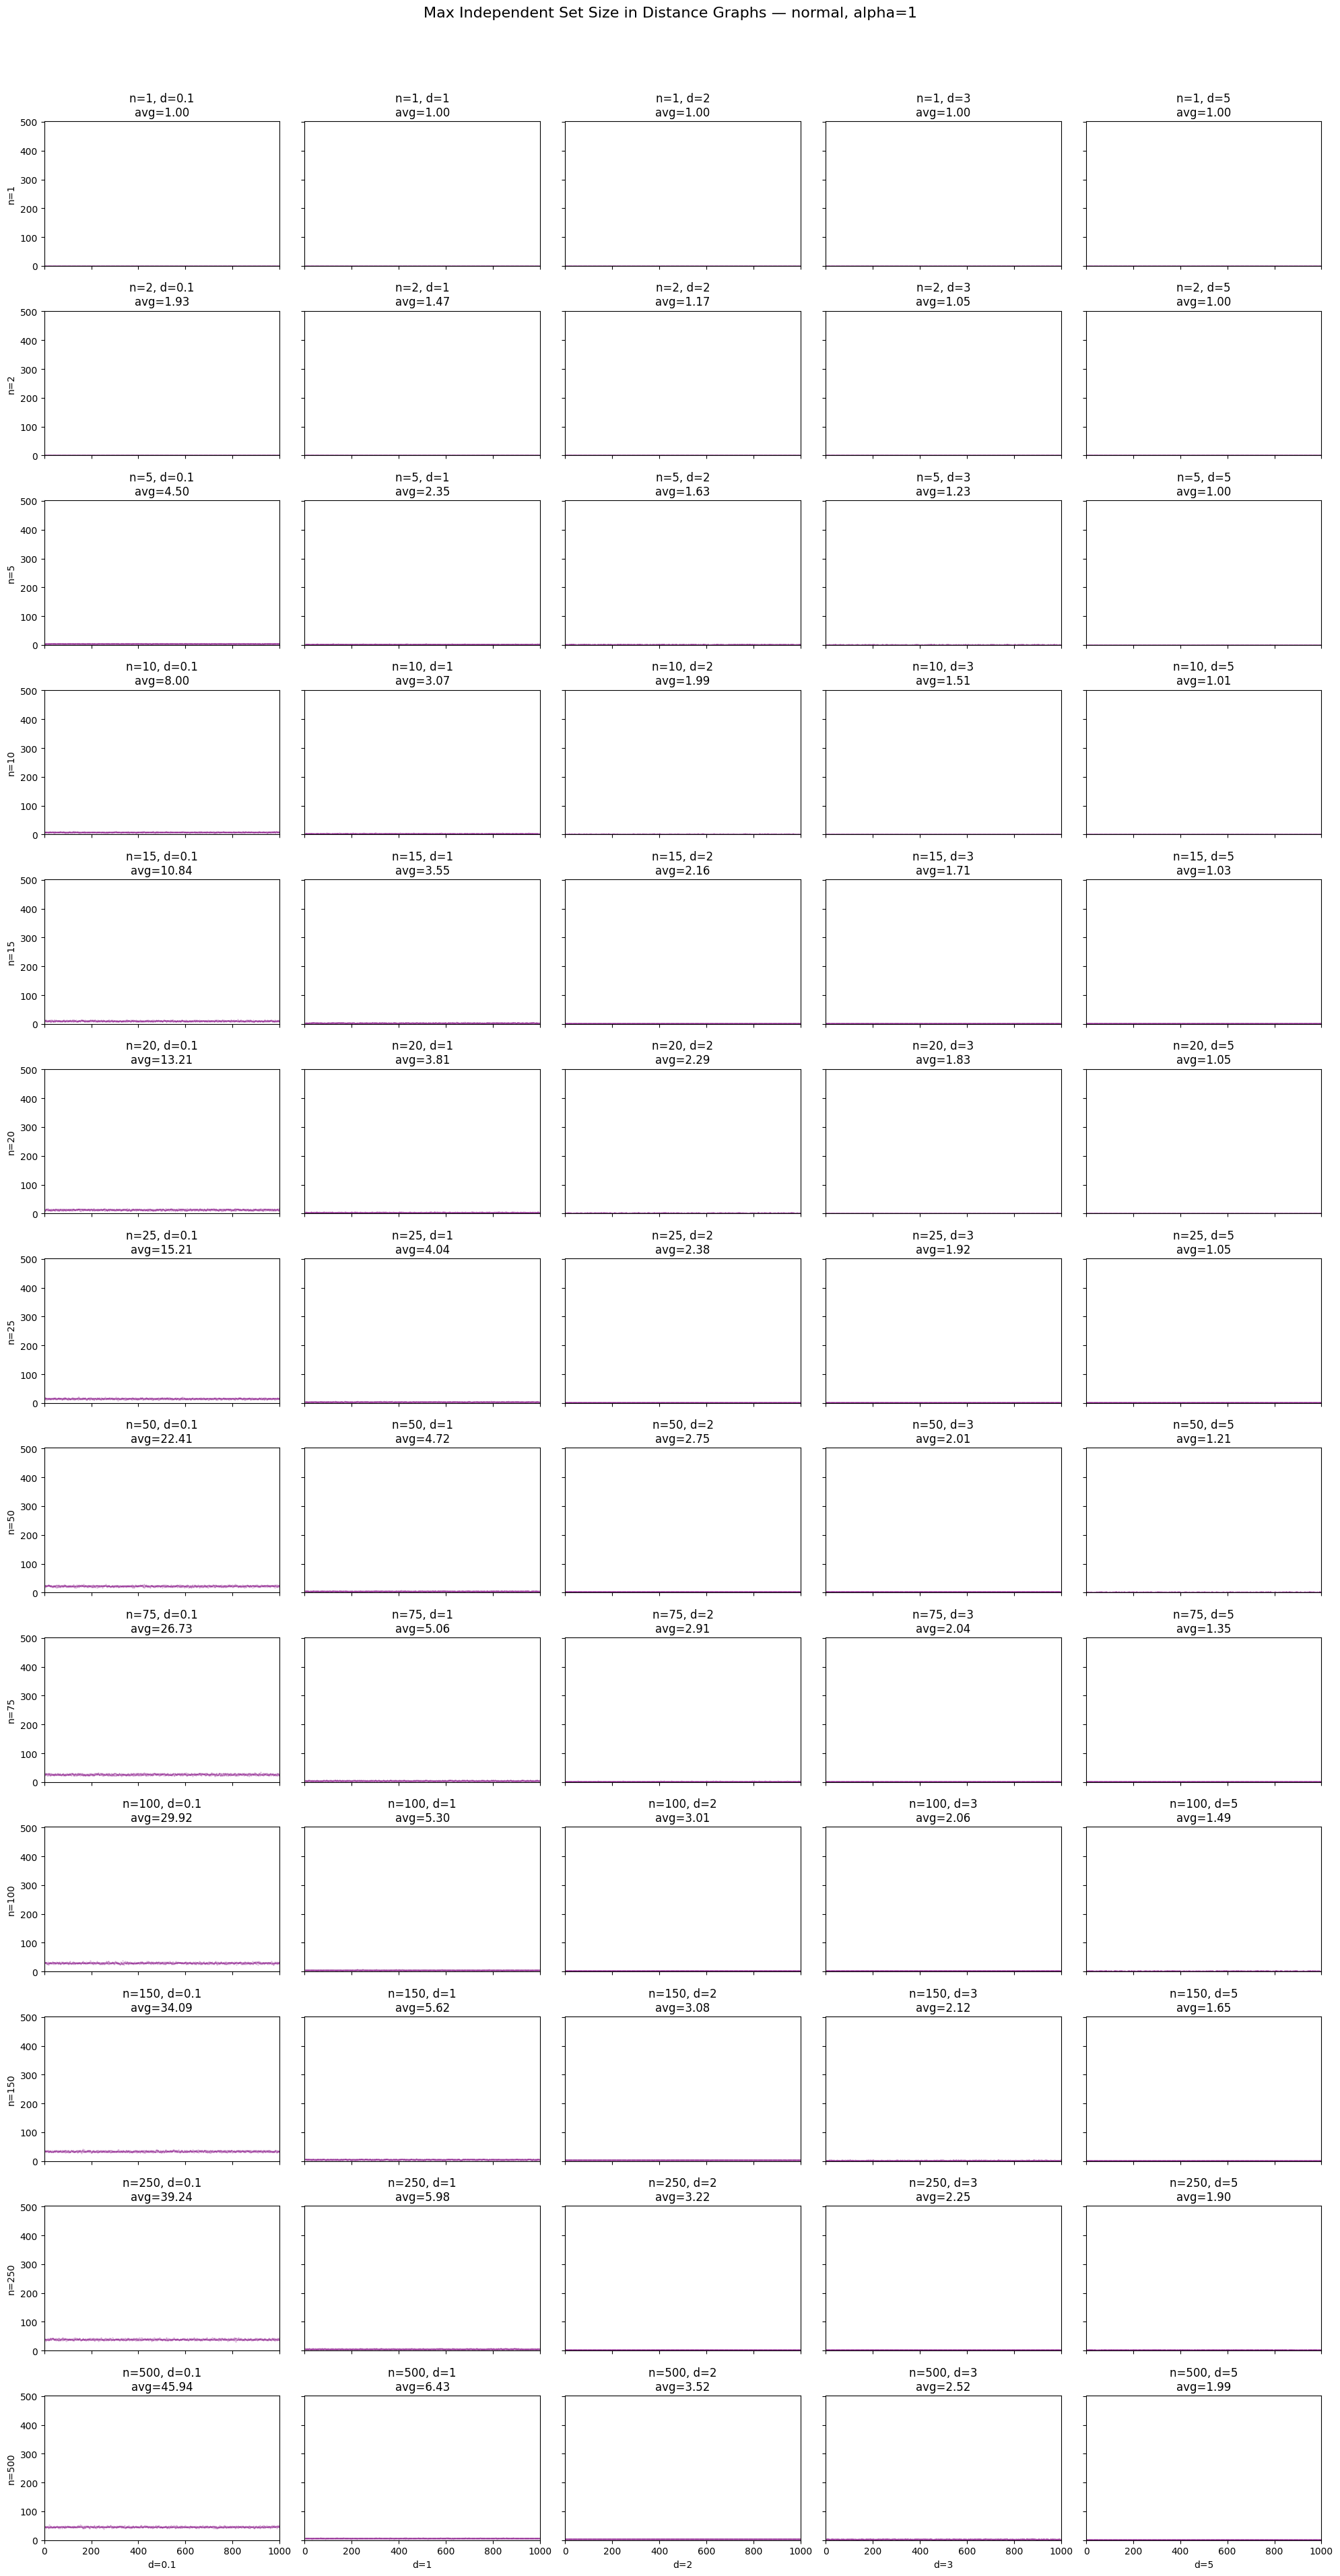

t3 sample sizes: 100%|██████████████████████████████████████████████████████| 13/13 [05:13<00:00, 24.11s/it]


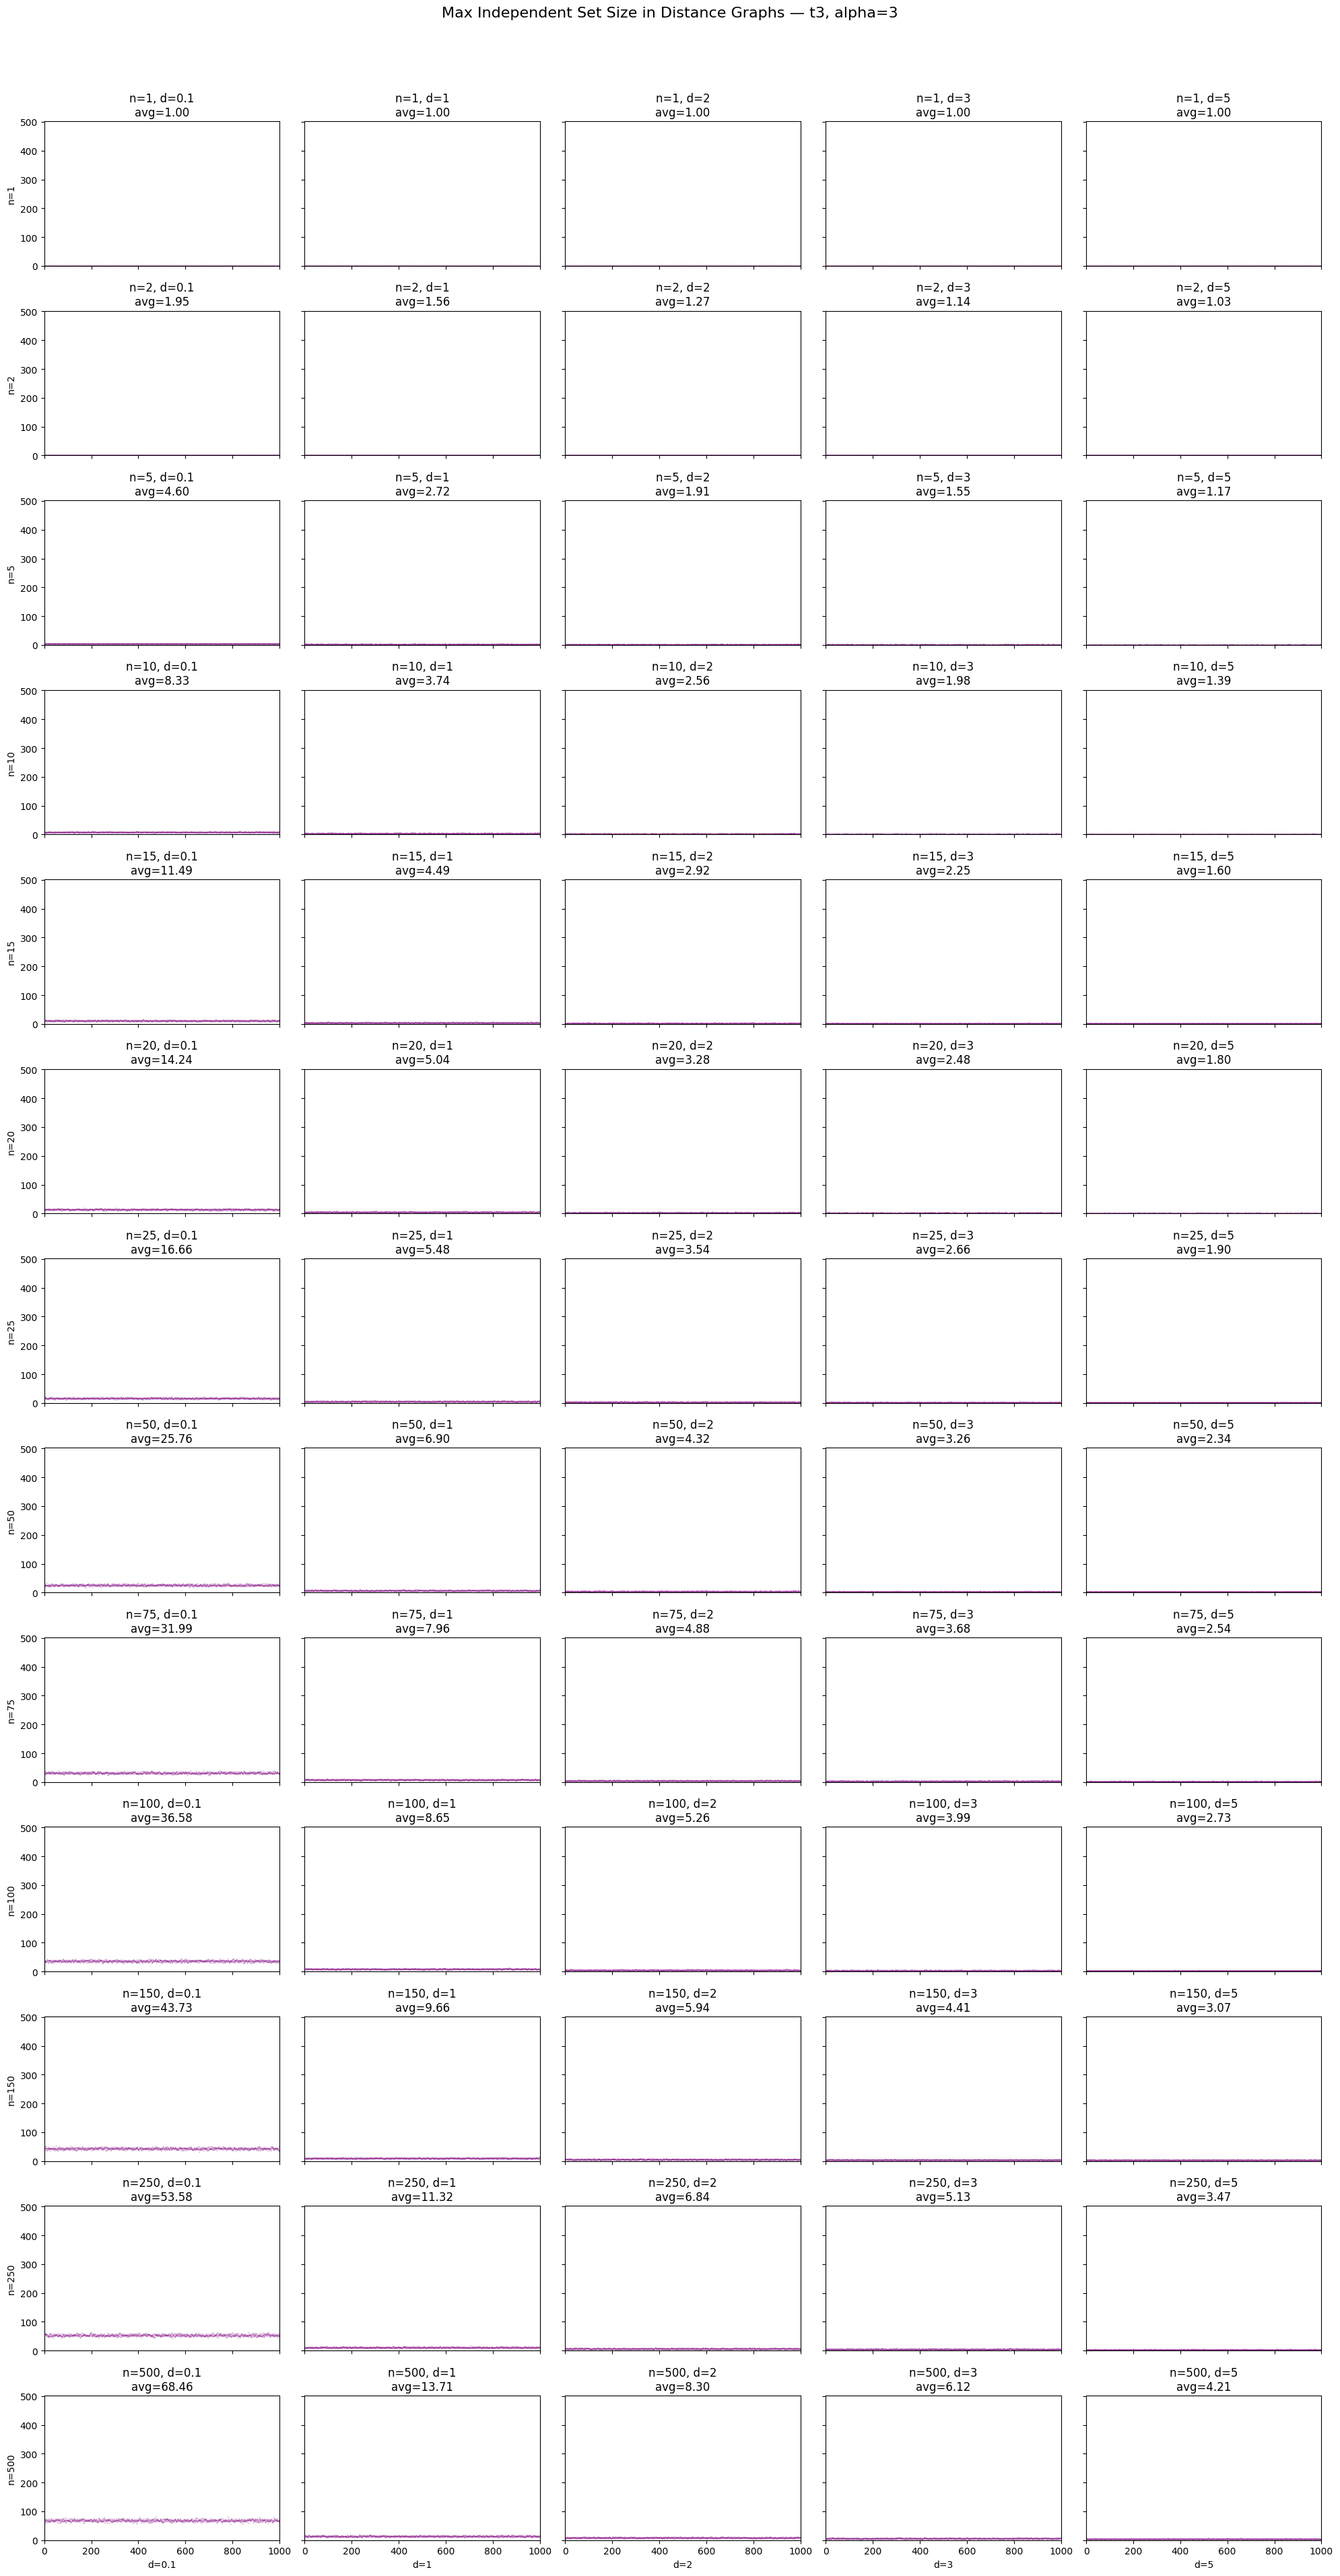

In [32]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 150, 250, 500]
distance_thresholds = [0.1, 1, 2, 3,5 ]
n_iter = 1000

plot_grid_mis_size_dist(distance_thresholds)

# Исследование зависимости числовой характеристики T от параметров процедуры построения графа и размера выборки



In [9]:
def generate_h_dist(dist: str, alpha: float, n_samples: int, sample_size: int):
    return [generate_sample(dist, alpha, sample_size) for _ in range(n_samples)]

def generate_a_stat(h0_samples, h1_samples, calculation, graph_builder, graph_param, alpha):
    h0_T = [calculation(graph_builder(sample, graph_param)) for sample in h0_samples]
    h1_T = [calculation(graph_builder(sample, graph_param)) for sample in h1_samples]

    threshold = np.quantile(h0_T, 1 - alpha)  # правосторонний критерий
    error = np.mean([t > threshold for t in h0_T])
    power = np.mean([t > threshold for t in h1_T])
    return [threshold], power, error


kNN k values: 100%|███████████████████████████████████████████████████████████| 5/5 [01:53<00:00, 22.62s/it]


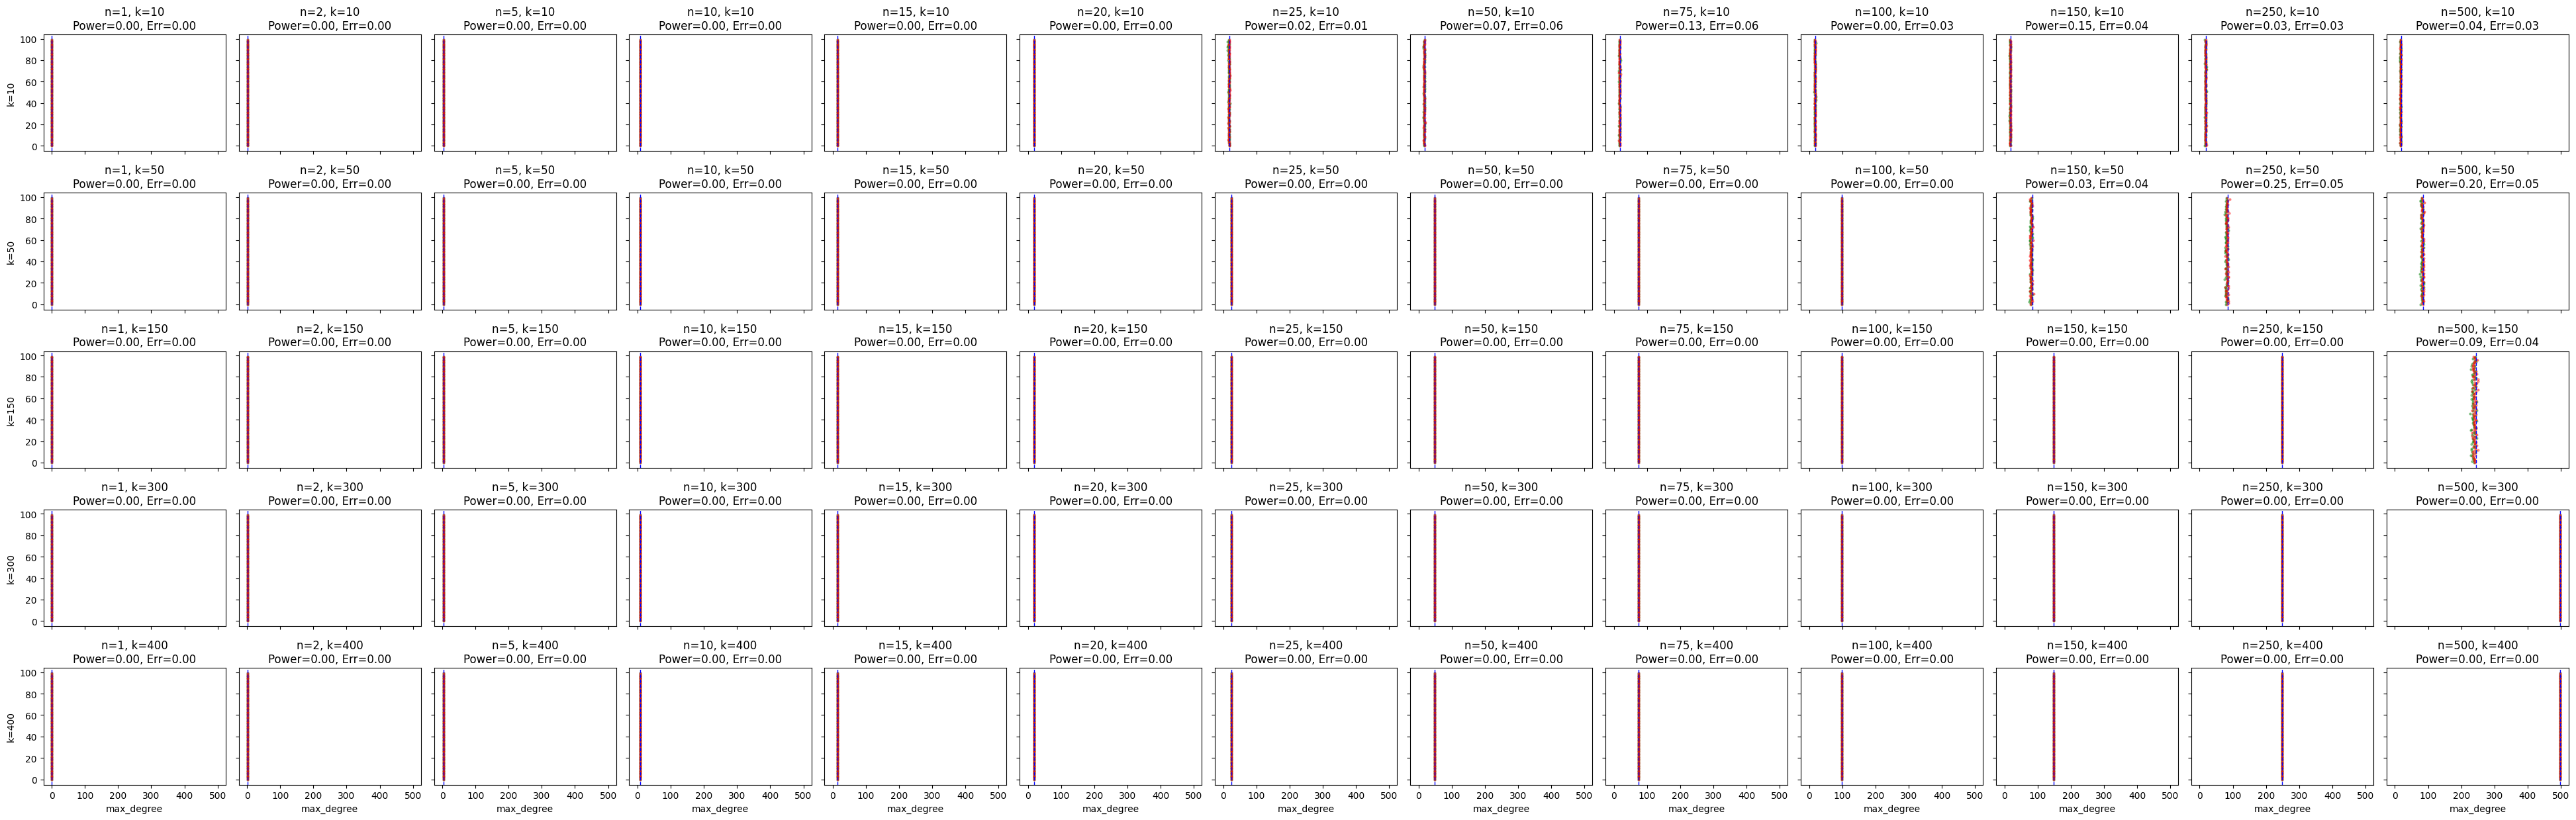

In [21]:
k_list = [10, 50, 150, 300, 400]
n_iter = 100
alpha = 0.055

fig, axes = plt.subplots(
    nrows=len(k_list), ncols=len(n_samples_list),
    figsize=(3 * len(n_samples_list), 2.5 * len(k_list)),
    sharex=True, sharey=True
)

for i, k in enumerate(tqdm(k_list, desc="kNN k values")):
    for j, n in enumerate(n_samples_list):
        h0 = generate_h_dist("normal", 1.0, n_iter, n)
        h1 = generate_h_dist("t3", 3.0, n_iter, n)

        threshold_set, power, error = generate_a_stat(
            h0, h1,
            calculation=max_degree,
            graph_builder=build_knn_graph,
            graph_param=k,
            alpha=alpha
        )

        t_h0 = [max_degree(build_knn_graph(sample, k)) for sample in h0]
        t_h1 = [max_degree(build_knn_graph(sample, k)) for sample in h1]

        ax = axes[i, j]
        ax.scatter(t_h0, range(n_iter), color="green", alpha=0.4, s=4, label="H0: Normal")
        ax.scatter(t_h1, range(n_iter), color="red", alpha=0.4, s=4, label="H1: t(3)")
        for thr in threshold_set:
            ax.axvline(x=thr, color='blue', linestyle='--', linewidth=1)

        ax.set_title(f"n={n}, k={k}\nPower={power:.2f}, Err={error:.2f}")
        if i == len(k_list) - 1:
            ax.set_xlabel("max_degree")
        if j == 0:
            ax.set_ylabel(f"k={k}")

plt.tight_layout()
plt.show()

Distance d values: 100%|█████████████████████████████████████████████████████| 9/9 [30:46<00:00, 205.13s/it]


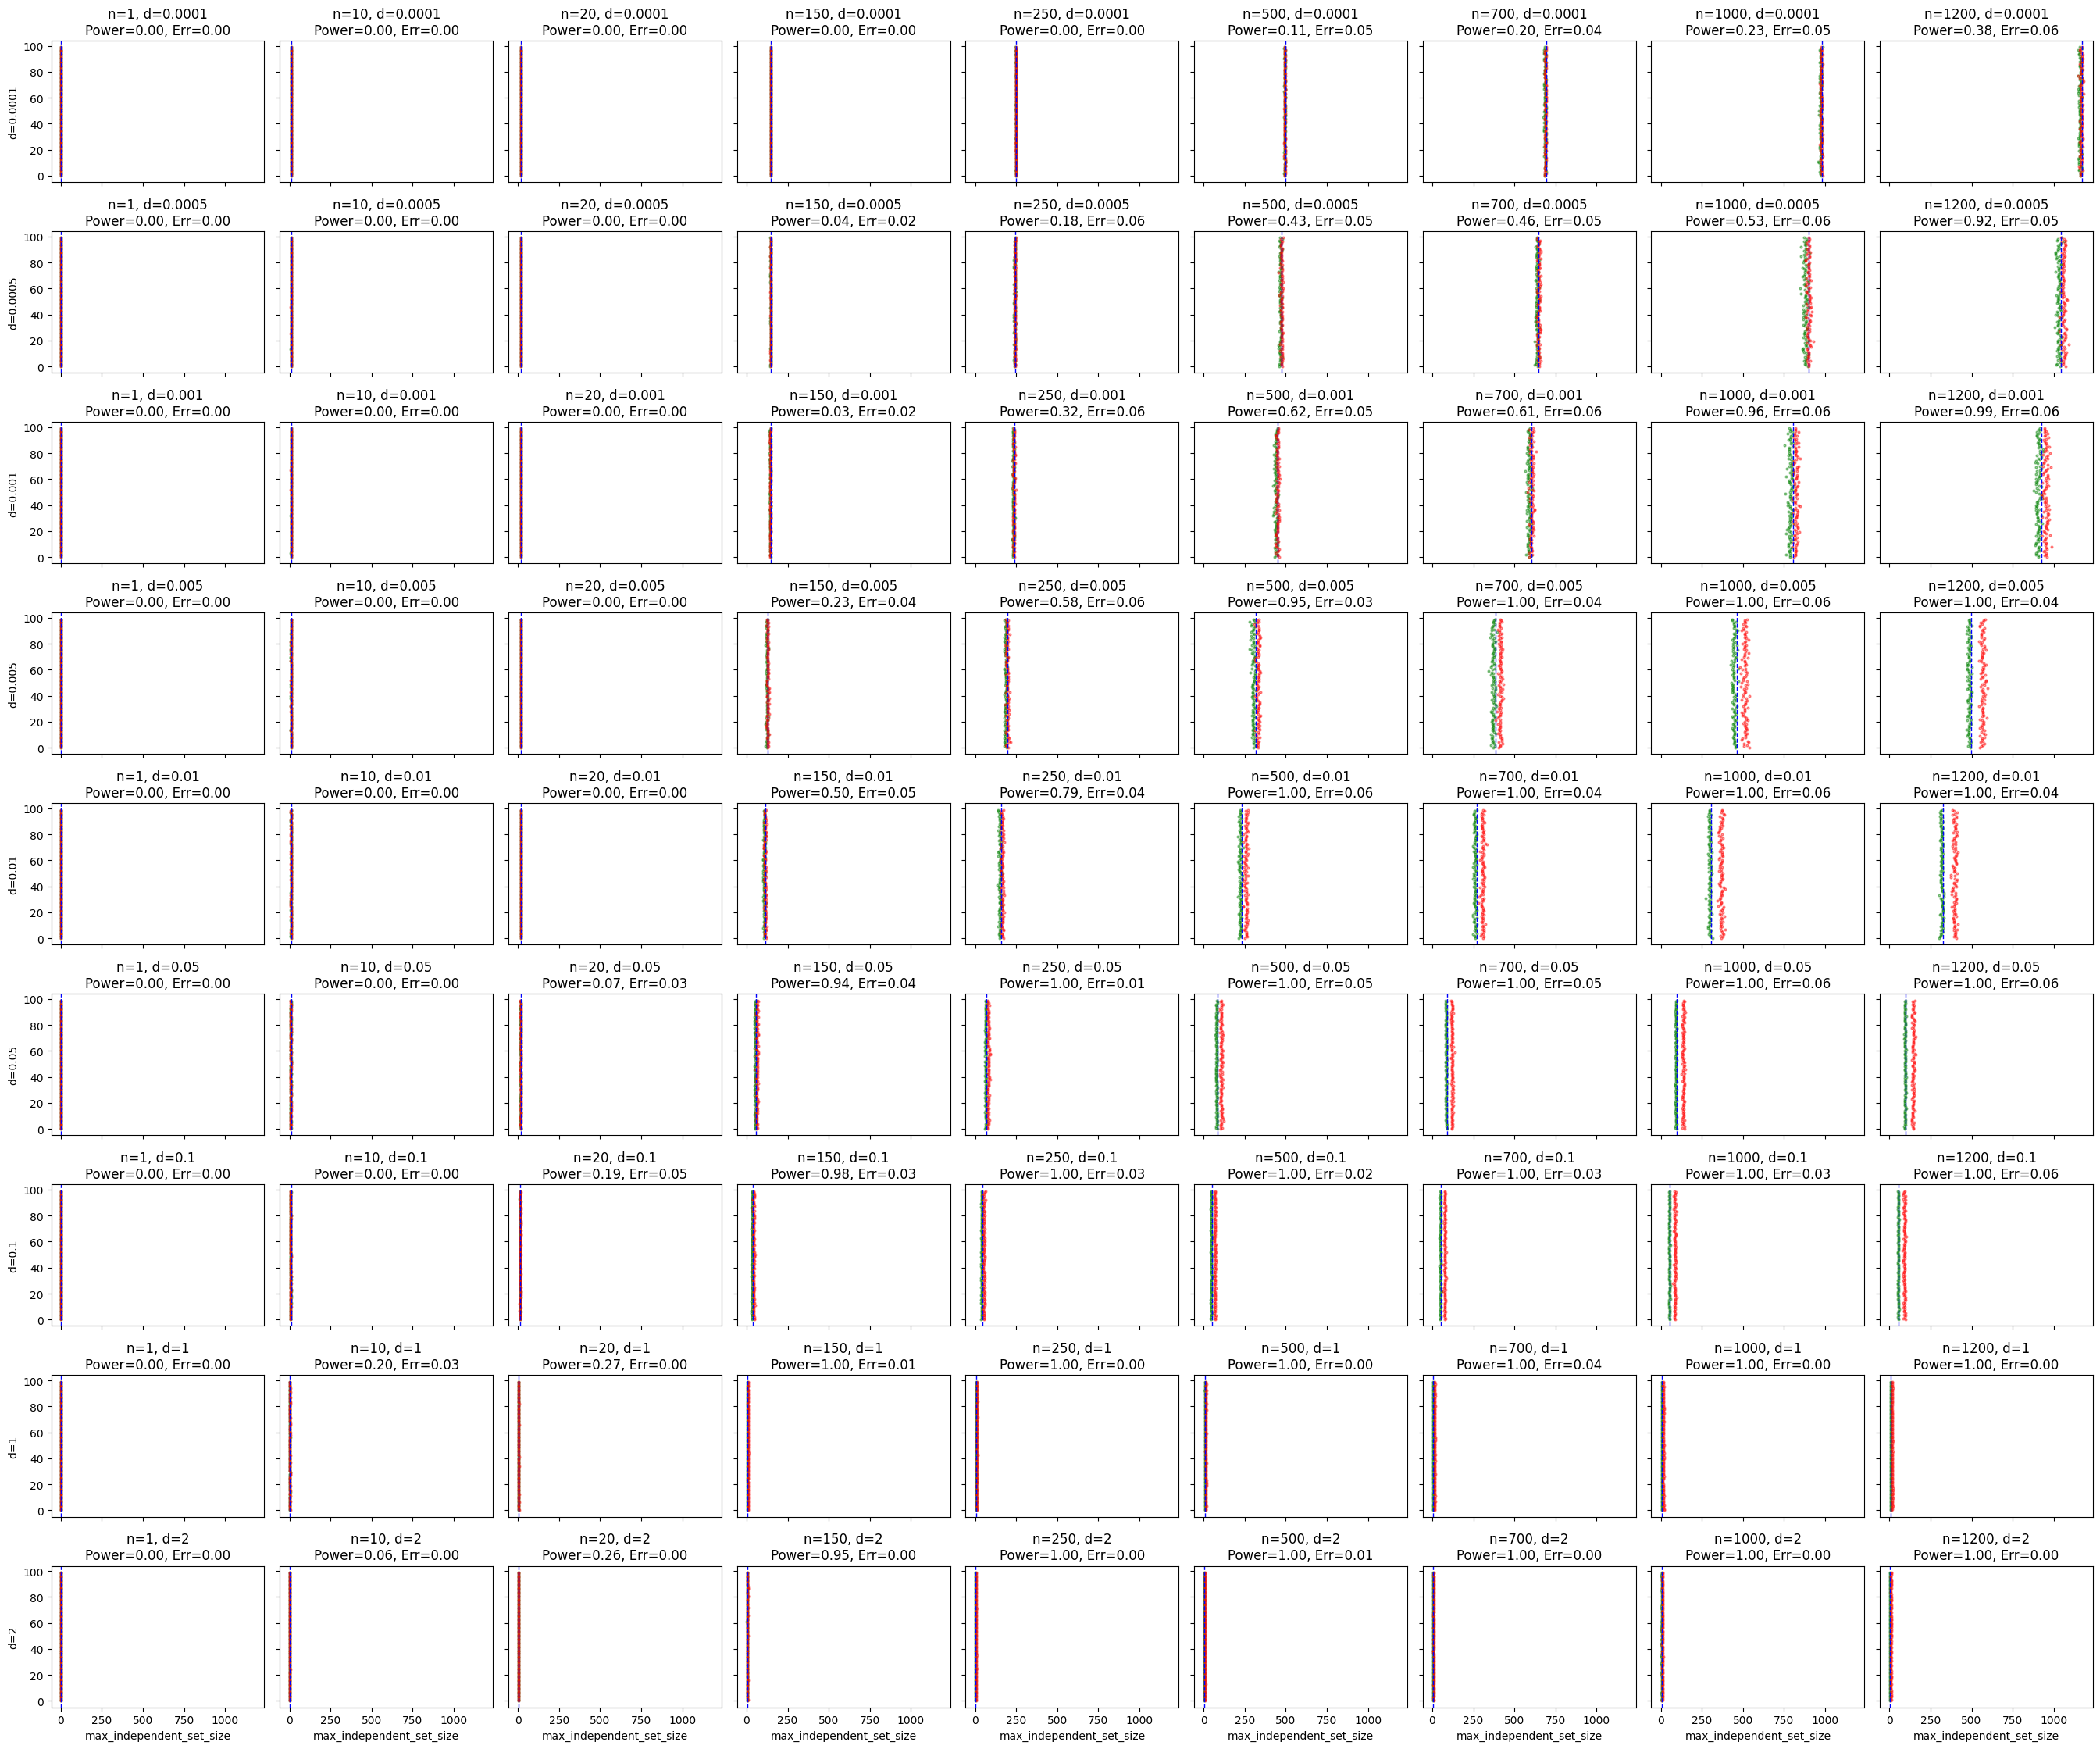

In [10]:
n_samples_list = [1, 10, 20, 150, 250, 500,700,  1000, 1200]
d_list = [0.0001,0.0005, 0.001,0.005, 0.01,0.05, 0.1, 1, 2]
n_iter = 100
alpha = 0.055

fig, axes = plt.subplots(
    nrows=len(d_list), ncols=len(n_samples_list),
    figsize=(3 * len(n_samples_list), 2.5 * len(d_list)),
    sharex=True, sharey=True
)

for i, d in enumerate(tqdm(d_list, desc="Distance d values")):
    for j, n in enumerate(n_samples_list):
        h0 = generate_h_dist("normal", 1.0, n_iter, n)
        h1 = generate_h_dist("t3", 3.0, n_iter, n)

        threshold_set, power, error = generate_a_stat(
            h0, h1,
            calculation=max_independent_set_size,
            graph_builder=build_distance_graph,
            graph_param=d,
            alpha=alpha
        )

        t_h0 = [max_independent_set_size(build_distance_graph(sample, d)) for sample in h0]
        t_h1 = [max_independent_set_size(build_distance_graph(sample, d)) for sample in h1]

        ax = axes[i, j]
        ax.scatter(t_h0, range(n_iter), color="green", alpha=0.4, s=4, label="H0: Normal")
        ax.scatter(t_h1, range(n_iter), color="red", alpha=0.4, s=4, label="H1: t(3)")
        for thr in threshold_set:
            ax.axvline(x=thr, color='blue', linestyle='--', linewidth=1)

        ax.set_title(f"n={n}, d={d}\nPower={power:.2f}, Err={error:.2f}")
        if i == len(d_list) - 1:
            ax.set_xlabel("max_independent_set_size")
        if j == 0:
            ax.set_ylabel(f"d={d}")

plt.tight_layout()
plt.show()
